In [2]:
import numpy as np
import os
import cv2
from tensorflow import keras
import matplotlib.pyplot as plt


# Define the directory containing your images
image_paths = "images"

# Load and preprocess the images and create labels
images = []
labels = []

for path in os.listdir(image_paths):
    # print(path)

    image = cv2.imread(os.path.join(image_paths, path), cv2.IMREAD_COLOR)  # Load as grayscale

    image = cv2.resize(image, (64, 64))  # Resize to a consistent size

    images.append(image)
    # Assuming image filenames contain information about whether they are "face" or "non-face"
    if "human" in path:
        labels.append(1)  # 1 for face
    else:
        labels.append(0)  # 0 for non-face

X = np.array(images)
y = np.array(labels)
print(y[925])
# Split the dataset into training, validation, and test sets
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

1


In [95]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.regularizers import l2  # Import L2 regularization
# Initialize the root node with a simple architecture

input_layer = keras.layers.Input(shape=(64, 64, 3))
# Flatten the input
flatten_layer = keras.layers.Flatten()(input_layer)

# Define layers for the first input
hidden_layer1 = keras.layers.Dense(1, activation='selu')(flatten_layer)

# layer 1 neuron 1 child
layer1_child1 = keras.layers.Dense(1, activation='selu',kernel_regularizer=l2(0.01))(hidden_layer1)

#adiing drop out to reduce over fitting
dropout1 = keras.layers.Dropout(0.5)(layer1_child1)

# Define layers for the second input
hidden_layer2 = keras.layers.Dense(1, activation='selu')(flatten_layer)
# layer 1 neuron 1 child
layer2_child1 = keras.layers.Dense(1, activation='selu',kernel_regularizer=l2(0.01))(hidden_layer2)

#adiing drop out to reduce over fitting
dropout2 = keras.layers.Dropout(0.5)(layer2_child1)

# Define layers for the third input
hidden_layer3 = keras.layers.Dense(1, activation='selu',kernel_regularizer=l2(0.01))(flatten_layer)

# Define layers for the fourth input
hidden_layer4 = keras.layers.Dense(1, activation='selu',kernel_regularizer=l2(0.01))(flatten_layer)

#Combined tree neural netowrk
combined = keras.layers.concatenate([dropout1,dropout2,hidden_layer3,hidden_layer4])

# Additional layers for combined outputs
dense_layer = keras.layers.Dense(1, activation='selu',kernel_regularizer=l2(0.01))(combined)

#final output layer
output_layer = keras.layers.Dense(1, activation='sigmoid')(dense_layer)

# Create the model
model = keras.models.Model(inputs=[input_layer], outputs=output_layer)
adam=Adam(learning_rate=1.235)
model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
# Train the current node on the training subset
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Model: "model_73"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_76 (InputLayer)          [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 flatten_74 (Flatten)           (None, 12288)        0           ['input_76[0][0]']               
                                                                                                  
 dense_503 (Dense)              (None, 1)            12289       ['flatten_74[0][0]']             
                                                                                                  
 dense_505 (Dense)              (None, 1)            12289       ['flatten_74[0][0]']             
                                                                                           

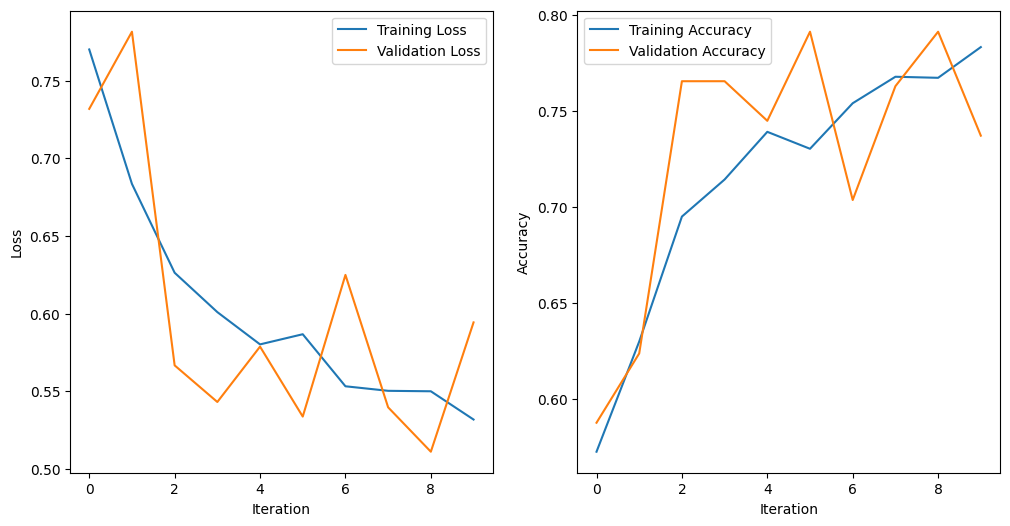

In [97]:
# Plot the loss and accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
#plt.plot(test_losses, label='Test Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#plt.plot(history.history['accuracy'], label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()


plt.show()